In [2]:
import pandas as pd
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

In [3]:
df = pd.read_csv("input/app_v1_feedback.txt", sep="\t", header=0, encoding = "latin1")

In [4]:
df.head()

,person_id,segment_id,text,tags
0,1,1,Jetzt sehen Sie vermutlich die Startseite. OK....,{general}
1,1,2,Ja genau. Vielleicht hätte ich jetzt Lektion d...,{general}
2,1,3,"OK, das heißt ich geb jetzt hier meine Initial...",{general}
3,1,4,"Und den Code muss ich irgendwie kopieren, oder?",{general}
4,1,5,"OK. Ach das steht auch da, muss ich mir nichts...",{general}


In [5]:
df = df.drop(columns=['person_id', 'segment_id', 'tags'], 
             axis = 1)

In [6]:
df.head()

,text
0,Jetzt sehen Sie vermutlich die Startseite. OK....
1,Ja genau. Vielleicht hätte ich jetzt Lektion d...
2,"OK, das heißt ich geb jetzt hier meine Initial..."
3,"Und den Code muss ich irgendwie kopieren, oder?"
4,"OK. Ach das steht auch da, muss ich mir nichts..."


In [7]:
df['text_processed'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
C:\Users\vanandkuma\AppData\Local\Temp\ipykernel_2504\3268311697.py:2: DeprecationWarning: invalid escape sequence '\.'
  df['text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [8]:
df['text_processed'] = \
df['text_processed'].map(lambda x: x.lower())

In [9]:
df['text_processed'].head()

0    jetzt sehen sie vermutlich die startseite ok w...
1    ja genau vielleicht hätte ich jetzt lektion da...
2    ok das heißt ich geb jetzt hier meine initiale...
3        und den code muss ich irgendwie kopieren oder
4    ok ach das steht auch da muss ich mir nichts m...
Name: text_processed, dtype: object

In [10]:
long_string = ','.join(list(df['text_processed'].values))

In [11]:
wordcloud = WordCloud(background_color = "white", max_words = 500, 
                      contour_width = 3, 
                      contour_color = 'steelblue')

C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


In [12]:
wordcloud.generate(long_string)

C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is d

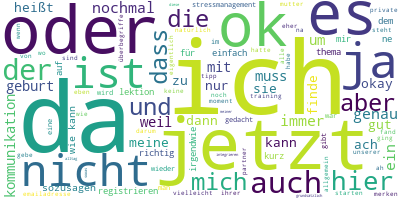

In [13]:
wordcloud.to_image()

In [14]:
stop_words = stopwords.words('german')

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), 
                                             deacc = True))

In [16]:
def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) 
            if word not in stop_words] for doc in texts]

In [17]:
data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [18]:
data_words = remove_stopwords(data_words)

In [133]:
#print(data_words)

In [21]:
id2word = corpora.Dictionary(data_words)

In [22]:
texts = data_words

In [24]:
corpus = [id2word.doc2bow(text) for text in texts]

In [137]:
#pprint(corpus)

In [25]:
num_topics = 3

In [26]:
lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                       id2word = id2word, 
                                       num_topics = num_topics)

In [27]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"ja" + 0.010*"ok" + 0.010*"gut" + 0.010*"ach" + 0.010*"irgendwie" + '
  '0.009*"gibt" + 0.009*"finde" + 0.008*"kommunikation" + 0.008*"nochmal" + '
  '0.008*"registrieren"'),
 (1,
  '0.022*"nochmal" + 0.019*"geburt" + 0.017*"ok" + 0.017*"kommunikation" + '
  '0.016*"sozusagen" + 0.014*"fur" + 0.014*"gibt" + 0.014*"kurz" + 0.013*"ja" '
  '+ 0.013*"genau"'),
 (2,
  '0.048*"ok" + 0.045*"ja" + 0.016*"immer" + 0.016*"genau" + 0.013*"ach" + '
  '0.013*"finde" + 0.012*"heißt" + 0.011*"ne" + 0.011*"gut" + 0.011*"lektion"')]


In [28]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'output/ldavis_prepared_topics_three'

In [29]:
if __name__ == '__main__':
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, 
                                                  id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

In [30]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [31]:
pyLDAvis.save_html(LDAvis_prepared, 'output/ldavis_prepared_topics_three.html')

In [32]:
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.040657  0.0       1        1  62.032793
1      0.046464  0.0       2        1  35.674829
0     -0.005807  0.0       3        1   2.292378, topic_info=            Term       Freq      Total Category  logprob  loglift
33            ja  10.000000  10.000000  Default  30.0000  30.0000
38           ach   2.000000   2.000000  Default  29.0000  29.0000
48     irgendwie   2.000000   2.000000  Default  28.0000  28.0000
144         gibt   2.000000   2.000000  Default  27.0000  27.0000
102        finde   3.000000   3.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
31         immer   0.055690   4.605712   Topic3  -4.8807  -0.6397
168    sozusagen   0.050541   3.296539   Topic3  -4.9777  -0.4023
34       lektion   0.048377   2.451409   Topic3  -5.0215  -0.1498
155  integrieren   0.045012   1.827744   Topic3  -5.0936   0.0717
110      partner   0.044801   1.780144   Topic3  -5.0983   0.0934

[173 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
38        1  1.008723            ach
176       1  0.925645    achtsamkeit
87        1  1.096210             ah
80        1  1.070327      allgemein
148       2  0.802010  allgemeineres
...     ...       ...            ...
70        2  0.789966     webbasiert
198       1  0.905476           weiß
173       2  0.808398        wieviel
71        2  0.799027         wissen
175       2  0.803642           zeit

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])